# Data Visualization with Altair: a grammar of graphics for Python
<img src="altair.png">

## Outline:

- I. Two approaches to data visualization APIs: tell me how and tell me what
- II. Wilkinson's grammar of graphics
- III. Altair, Vega-Lite, and Vega
- IV. Altair in Practice

## Two approaches to data visualization APIs: tell me how and tell me what

- **Imperative approach**: specifies the **"how"** (e.g., matplotlib):
    - Pros: **fine-graned control** over chart specification
    - Cons: **Verbose**, makes you think about low-level visualization details
- **Declarative approach**: specifies the **"what"** (e.g., altair, plotnine (ggplot2)):
    - Pros: fast development, conciseness, and lets you **concentrate on visualization content**
    - Cons: **less control** over chart details, trust someone elses decisions about low level graph properties

## Wilkinson's Grammar of graphics:
- **Mathematical foundations** for statistical graphics
- Proposed a **grammar** to formalize his idea
- **Grammar of graphics**: a system of rules and primitives to generate meaninful perceivable graphics
- Postulate: **taxonomies of charts are harmful**

### Why a grammar instead of a taxonomy?
- **Taxonomies of charts are like list of words**: you can generate as many graphics as categories (words) in your taxonomy, but no more. Hence, is limiting.
- **A grammar is expressive and generative**: allows the creation of graphics beyond the limits of graph taxonomies
- Grammars **are not limitless** in their generativity, but the **space of graphical objects to be generated is larger**

### Core elements of any statistical graphics specification (Wilkinson):

- **DATA**: a set of data operations that create variables from datasets
- **TRANS**: variable transformations (e.g., rank)
- **SCALE**: scale transformations (e.g., log)
- **COORD**: a coordinate system (e.g., polar)
- **ELEMENT**: graphs (e.g., points) and their aesthetic attributes (e.g., color)
- **GUIDE**: one or more guides (axes, legends, etc.)

Wilkinson: **"These components link data to objects and specify a scene containing those objects"**

## Altair, Vega-Lite, and Vega
- **Altair**: a declarative statistical visualization library for Python, based on Vega-Lite and Vega. Created by **Jake VanderPlas** and **Brian Granger**
- **Vega-Lite**: Vega-Lite is a high-level grammar of interactive graphics (High level API for Vega)
- **Vega**: is a visualization grammar, a declarative language for creating, saving, and sharing interactive visualization designs

### How Altair works

- **Step 1**: Altair’s Python API emits Vega-Lite JSON data specification 
- **Step 2**: Vega-Lite JSON is compiled to a full Vega specification
- **Step 3**: Vega specification is then parsed and executed using a reactive runtime that internally makes use of D3.js
- **Step 4**: chart is rendered in a [user-interface](https://altair-viz.github.io/user_guide/display_frontends.html#display-general) such as the Jupyter Lab, VSCODE, and others

### Altair's/Vega-Lite's building blocks:
- **Data**: input data to visualize, a relational table consisting of rows and columns.
- **Transforms**: data can be subject to transformations such as filter, aggregation, binning, etc
- **Marks**:  geometric object to visually encode data-records such as bar, line, area, text, rule, and symbols (point and tick)
- **Encodings**: mapping between data attributes (cols) and properties of visual marks such as position (x, y), color, shape, size, and text.
- **Scales**: functions that map data values to visual values
- **Guides**: Axes and legends that visualize scales (ordinal, quantitative, nominal)

## Note:
This tutorial/talk is based on a series of online resources that you may want to look closer: 

- [Wilkinson, L. (2005). The Grammar of Graphics. Springer](https://www.springer.com/gp/book/9780387245447)
- [VanderPlas, et all (2018). Altair: Interactive statistical visualizations for python. Journal of open source software, 3(32), 1057.](https://idl.cs.washington.edu/files/2018-Altair-JOSS.pdf)
- [Satyanarayan, A., Moritz, D., Wongsuphasawat, K., & Heer, J. (2016). Vega-lite: A grammar of interactive graphics. IEEE transactions on visualization and computer graphics, 23(1), 341-350.](https://idl.cs.washington.edu/files/2017-VegaLite-InfoVis.pdf)

**Talks/turorials:**

- [Dominik Moritz and Kanit Wongsuphasawat - Vega-Lite: A Grammar of Interactive Graphics](https://www.youtube.com/watch?v=Nsrz4YdaZ_A)
- [Jake VanderPlas - Exploratory Data Visualization with Vega, Vega-Lite, and Altair](https://www.youtube.com/watch?v=ms29ZPUKxbU)
- [Leland Wilkinson, H2O.ai - The Grammar of Graphics and the Future of Big Data Visualization](https://www.youtube.com/watch?v=1X93Sum_SyM)

## Altair in practice

In [1]:
import pandas as pd
import altair as alt
from pprint import pprint

In [2]:
url = "../data/diabetes_data.csv"
data = pd.read_csv(url)

In [3]:
data.shape

(101766, 51)

## Working with large datasets on Altair

Altair specification incorporates both the **code** AND the **data** (JSON specification). If you try to generate multiple charts from large datasets, you can get a **very large notebook** (hundreds of MB or more), since the whole specification is embedded into the notebook itself. 

To prevent this, Altair triggers a **MaxRowsError exception** when you try to generate plots from datasets larger than **5,000 rows**. There are couple of ways to get around it:

1. **Passing Data by URL**, such that the data is query from an external source
2. **Disabling MaxRowsError**, allowing Altair to embedd the data in the notebook
3. **Local Filesystem**, such that when you make a plot the data will be saved to disk, rather than being embedded in the notebook*
4. **Local Data Server**, such that your data is served from a local threaded server. The [**altair_data_server**](https://github.com/altair-viz/altair_data_server) package provides this functionality*

*This may not work in certain cloud computing enviroments

More info: https://altair-viz.github.io/user_guide/faq.html

For instance, if we try to generate a chart from our **101.766** rows dataset, we will get this error: 

In [4]:
chart = alt.Chart(data).mark_bar().encode(
     x='gender',
     y='num_medications'
)
chart

MaxRowsError: The number of rows in your dataset is greater than the maximum allowed (5000). For information on how to plot larger datasets in Altair, see the documentation

alt.Chart(...)

For now, we will allow to save a csv (you can use JSON too) object in our local filesystem. **Disabling the max rows is not recommended since working with large notebooks is slow and can crash your RAM**

In [5]:
alt.data_transformers.enable('csv')

DataTransformerRegistry.enable('csv')

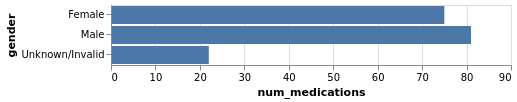

In [6]:
chart = alt.Chart(data).mark_bar().encode(
     x='num_medications',
     y='gender'
)
chart

Internally, Altair will generate a Vega-Lite specification in JSON format as follow

In [7]:
pprint(chart.to_dict())

{'$schema': 'https://vega.github.io/schema/vega-lite/v3.4.0.json',
 'config': {'mark': {'tooltip': None}, 'view': {'height': 300, 'width': 400}},
 'data': {'format': {'type': 'csv'},
          'url': 'altair-data-cf2bd851a7c068a3092c55520778b4e8.csv'},
 'encoding': {'x': {'field': 'num_medications', 'type': 'quantitative'},
              'y': {'field': 'gender', 'type': 'nominal'}},
 'mark': 'bar'}


The 'url' is linking to the **csv** file saved locally, which normally would be saved in the notebook itself. We can inspect the Vega specification by clicking in the chart (...) and **"Open in Vega editor"**

**A few tips:**
- At the end of your session, you can run `!rm *csv` to avoid pushing large files to github
- You also can remove all charts from the notebook before saving and pushing by clicking on **'Kernel' -> 'Restart Kernel and Clear All Outputs'**. This will leave a very lightweight notebook.

In [8]:
!rm *.csv

For the purposes of this tutorial we will take a sample of the larger dataset to work faster.

In [9]:
data_sample = data.sample(n=1000, replace=False, random_state=1)
data_sample.shape

(1000, 51)

We will use the race/ethnicity variable a lot, so we will select the main ones for clarity

In [10]:
groups = ['AfricanAmerican', 'Asian', 'Caucasian', 'Hispanic']
data_sample = data_sample[data_sample['race'].isin(groups)]

In [11]:
data_sample.shape

(967, 51)

To delete the created objects and go back to default Altair functionality run:

In [12]:
del data 
del chart

In [13]:
alt.data_transformers.enable('default') # restore default for Altair

DataTransformerRegistry.enable('default')

## Unit specification: single cartesian chart or single view

A **single cartesian chart**, also refered as sigle **"view"**, describes a graphical object composed of a dataset, a mark type, and a set of encodings for visual channels such as color, size, position, etc.

### Generating a strip plot
- Here we create a basic Altair/Vega-Lite chart object as ```Chart(data)``` with data as argument
- Next, we chose to represent each record (row) as a tick mark ```mark_tick()```
- Finally, we encode the values in visual properties of the chart, in this case, as the x axis ```encode(x='num_medications')```

In [14]:
# strip =
# strip

Altair/Vega-Lite will **automatically resolve any ambiguity** as the data type, lendend, and axis, by filling in with **sensible defaults**. These defaults are design to follow best practices on visualization design, and they can be overwritten as needed.

### Generating a histogram
- Altair/Vega-Lite it is not based on taxonomies of charts, yet, any chart can be generated by reasoning about the **underlying operations and elements** needed to create the chart
- For an histogram, we need to:
    - **Discretize** the data into bins
    - Encode the **aggregated count** of records within each bin as the y axis
    - Use a **'bar' as the geometric object** (mark) representing the aggregated data 

In [15]:
# x = "num_medications:Q"
# y = "count()"
# Add: Chart, mark, encodings
# hist =
# hist

Altair/Vega-Lite allows to **incrementaly customize** our charts by **maping value attributes to encoding channels**. For instance, within each bin, we can encode race/ethnicity as a color attribute

In [16]:
#color="race:N"
#hist1 =
#hist

Here you can notice that Altair/Vega-Lite **automatically stacked the bars** to avoid overlapping them on top of each other. This is an example of the automatic selection of sensible defaults. We can see what would why stacking is better than overlapping by setting the stack to None.

In [17]:
#y="count()"
#hist2 = 
#hist2

Her each bar is plotted on top of each other, so it is hard to appreciate the overall picture. Nevertheless, Altair/Vega-Lite **still selects nice defaults** by overlaying smaller bars on top of the larger ones.

### Generating an scatter plot

Again, we have to answer a few simple questions:
- What **geometric object** is typically used to generate a scatter plot?
- What **encoding channels** are typically used in a scatter plot?

In [18]:
# alt.X("num_medications:Q")
# alt.Y("num_lab_procedures:Q")
# color="insulin:N"
# scatter=
# scatter

### Generating a heatmap 
- To generate a heatmap we just need to map each variable to the appropriate channels of the view:
    - x = variable 1
    - y = variable 2
    - a rectangle, as the geometric object representing data values
    - color, as a representation of some value aggregation (mean in this case)

In [19]:
# x='age'
# y='race'
# color='mean(number_diagnoses)'
# heatmap =
# heatmap

We can easily customize our heatmap by changing dimensions and color schemes.

In [20]:
# dim = 300
# color=alt.Color('mean(number_diagnoses)', scale=alt.Scale(scheme='goldred'))
# heatmap1 =
# heatmap1

Many of the customization elements of Altair can be found in the Vega-Lite and Vega documentation. For instance, color schemes can be found here https://vega.github.io/vega/docs/schemes/

## Multiple unit specification: multiple cartesian charts or composite view

A composite view describe the combination of multiple unit views (single charts) via **composition operators**. The four main composition operators are: **facet, repeat, layer, and concatenation**.

### Faceted chart

Faceted charts produces a **trellis plot by sub-setting the data into subgroups**. For quantitative variables scales and axes are shared by default. Facets are nice option for our histogram, since it makes clearer the distribution within each race/ethnicity.

In [21]:
# alt.X("num_medications:Q", bin=True),
# alt.Color('race:N', legend=None), # legends here are redundant
# y='count()'
#base = 

#column='race:N'
#facet_hist = 
#facet_hist

### Layered chart
Layering produces a view where **charts are plotted on top of each other**. In Altair/Vega-Lite this is accomplished in two steps:
- Generate each plot independently
- Add them together with the "+" operator

In [22]:
# x='mean(num_medications):Q'
# y='race:O'
# color=alt.Color('race:O', scale=alt.Scale(scheme='dark2'), legend=None)
# bar =
# bar

In [23]:
# x='mean(num_medications):Q'
# rule = 
# rule

In [24]:
# layered = _ + _
# layered

### Concatenated chart

The concat operator **"glue" together any type of charts**, vertically or horizontally

**Horizontal concatenation** is useful when comparing different X axis values on the same Y values. In Altair we use the **"|"** operator

In [25]:
# x='mean(number_diagnoses):Q',
# y='race:O',
# color=alt.Color('race:O', scale=alt.Scale(scheme='dark2'), legend=None)
# bar2 = 
# bar2

In [26]:
# hconcat = _ | _
# hconcat

**Vertical concatenation** is useful when comparing different Y axis values on the same X values. In Altair we use the **"&"** operator

In [27]:
# x='mean(number_diagnoses):Q'
# y='gender:N'
# color=alt.Color('gender:N', scale=alt.Scale(scheme='dark2'), legend=None)
# bar3 =
# bar3

In [28]:
# vconcat = _ & _
# vconcat

### Repeated chart


The repeat operator generates **multiple plots based on a list of encodings (e.g., column values)**. We can think in the repeat operator as a **more convenient/automated form of doing vertical/horizontal concatenation**. Essentially, it consolidates a recurrent use case for vertical and horizontal concatenation.

In [29]:
# alt.X(alt.repeat("column"), type='quantitative')
# alt.Y(alt.repeat("row"), type='nominal')

# row=['race', 'gender'],
# column=['number_diagnoses','num_medications']

# repeat =
# repeat

In [30]:
#alt.X(alt.repeat("column"), type='quantitative', aggregate='mean'),
#alt.Y(alt.repeat("row"), type='nominal'),
#alt.Color(alt.repeat("row"), type='nominal', legend=None)

#row=['race', 'gender'],
#column=['number_diagnoses','num_medications']

# repeat_color 
# repeat_color

## Adding interactivity

One important advantage of Altair compared to packages like matplotlib, seaborn, and plotnine, is its capacity of seamlessly **incoporating interatictivity into existing charts**. Specialized tools like plotly and bokeh also allow for static and interactive charts, yet they are more verbose and are designed with interactive dashboarding as their primary use case. 

Altair/Vega-Lite provides a **grammar of interaction**. This grammar is a bit more complex, yet easy to use and implement, so we will explore a few examples as reference. To learn more about the grammar of interaction, read the Satyanarayan, A., Moritz, D., Wongsuphasawat, K., & Heer, J. (2016) article.

To begin, **adding zooming and panning** to an scatter plot is a simple as attaching the ```interactive()``` method call to be base chart

In [31]:
#scatter

We can also interact with the chart via **"selections"**, by adding `selection=interval` to the chart properties

In [32]:
# interval = alt.selection_interval()
# scatter.properties(
# )

We can also add **encodings** to the interval selecction, by passing `encodings=['y']` as argument

In [33]:
# interval = alt.selection_interval()
# scatter.properties(
#     selection=interval
# )

We can further enhance our interval selecction by making properties of the chart **conditional on the selecction area**

For instance, we can make the color encoding conditional by modifying the color properties. To do this, we change the color encoding with `alt.conditional` and `alt.value`

In [34]:
# interval = alt.selection_interval()

# scatter_int = scatter.encode(
#     color= #@@ fill in here @@#
# ).properties(
#     selection=interval
# )
# scatter_int

In [35]:
# scatter_dash = _ | _.encode(y='number_diagnoses')
# scatter_dash

## Composed chart or dashboard

Composed charts can be composed again into **"metacharts"** or **dashboards of charts** by using the same composition operators, like concact, facet, etc.

In [36]:
# metachart =  (_ & _).resolve_scale(color='independent') 
# metachart

In [37]:
# metachart1 = (_ | _).resolve_scale(color='independent')
# metachart1

Finally, you can go really crazy **composing meta-meta-charts!**

In [38]:
# meta_meta_chart = _ & _
# meta_meta_chart